In [7]:
import numpy as np
from scipy import io
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [8]:
sns.set_palette('husl', 3)
pal = sns.husl_palette(3)

In [9]:
roc = io.loadmat('../data/roc_data.mat')

In [10]:
v0 = roc['compdata'][:,0].ravel()
v1 = roc['compdata'][:,1].ravel()
v2 = roc['compdata'][:,2].ravel()

In [11]:
xw, yw, _ = roc_curve(v2, v1, 1)
xr, yr, _ = roc_curve(v2, v0, 1)

w_auc = auc(xw, yw)
r_auc = auc(xr, yr)

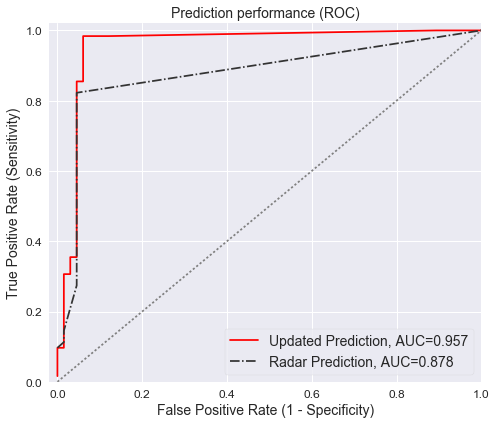

In [12]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.plot(xw, yw, color='r', label='Updated Prediction, AUC={0:.3f}'.format(w_auc))
ax.plot(xr, yr, color='0.2', linestyle='-.', label='Radar Prediction, AUC={0:.3f}'.format(r_auc))
ax.set_xlim(-0.02, 1.0)
ax.set_ylim(0, 1.02)
ax.set_ylabel('True Positive Rate (Sensitivity)', size=14)
ax.set_xlabel('False Positive Rate (1 - Specificity)', size=14)
ax.set_title('Prediction performance (ROC)', size=14)
ax.plot([0, 1], [0, 1], ':', color='0.5')
plt.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=4, frameon=True, fontsize=14)
plt.tight_layout()
plt.savefig('../img/fig6.png', bbox_inches='tight')